In [1]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [ ]:
data_path = '/content/drive/MyDrive/datasetcustomized.zip'

In [ ]:
!unzip "/content/drive/MyDrive/datasetcustomized.zip"

Archive:  /content/drive/MyDrive/datasetcustomized.zip
replace dataset/test/Acne and Rosacea/acne-closed-comedo-003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
data_path1= './dataset/train'

In [3]:
for folder in os.listdir(data_path1):
    print(folder)

Acne and Rosacea Photos
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Atopic Dermatitis Photos
Bullous Disease Photos
Cellulitis Impetigo and other Bacterial Infections
Eczema Photos
Lupus and other Connective Tissue diseases
Melanoma Skin Cancer Nevi and Moles
Psoriasis pictures Lichen Planus and related diseases


In [4]:
train_data = []
val_data = []

for folder in os.listdir(data_path1):
    folder_path = os.path.join(data_path1, folder)
    file = os.listdir(folder_path)
    num_train = int(0.8 * len(file))
    files_train = random.sample(file, num_train)
    files_val = list(set(file) - set(files_train))

    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        train_data.append((img, folder))

    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        val_data.append((img, folder))

In [5]:
import matplotlib.pyplot as plt

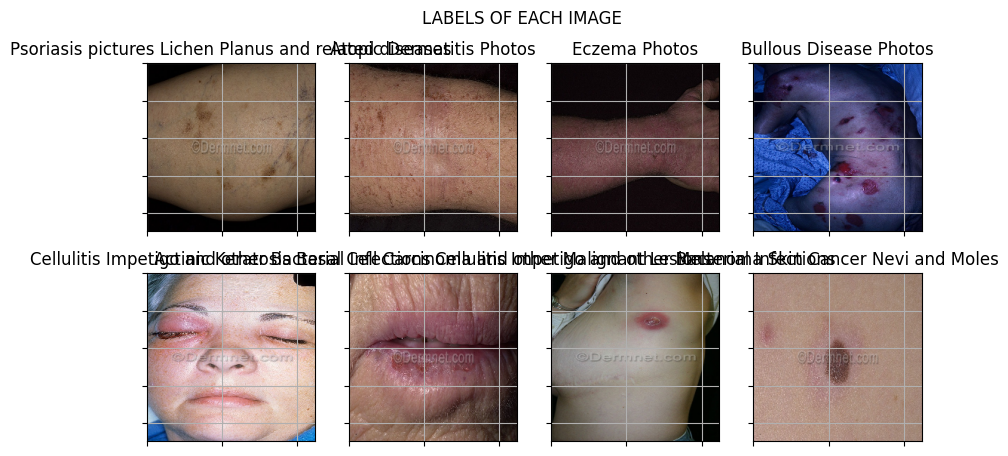

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.suptitle('LABELS OF EACH IMAGE')

for (img, label), ax in zip(random.sample(train_data, 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(True)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()

In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [8]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [9]:
base_model.trainable = False

In [10]:
num_classes = 9
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [11]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# train_data = [(preprocess_input(input), label) for input, label in train_data]
# val_data = [(preprocess_input(input), label) for input, label in val_data]


In [13]:
train_data = [(preprocess_input(input), label) for input, label in train_data]
val_data = [(preprocess_input(input), label) for input, label in val_data]

In [14]:
import numpy as np

In [15]:
print(train_data[:10])

[(array([[[  59.060997 ,   -6.7789993,  -29.68     ],
        [  50.060997 ,  -18.779    ,  -40.68     ],
        [  55.060997 ,  -14.778999 ,  -35.68     ],
        ...,
        [ -49.939003 ,  -85.779    , -104.68     ],
        [ -53.939003 ,  -86.779    , -102.68     ],
        [ -56.939003 ,  -86.779    , -101.68     ]],

       [[  47.060997 ,  -18.779    ,  -41.68     ],
        [  47.060997 ,  -18.779    ,  -41.68     ],
        [  54.060997 ,  -15.778999 ,  -37.68     ],
        ...,
        [ -40.939003 ,  -76.779    ,  -94.68     ],
        [ -52.939003 ,  -85.779    , -101.68     ],
        [ -48.939003 ,  -78.779    ,  -93.68     ]],

       [[  57.060997 ,   -6.7789993,  -30.68     ],
        [  51.060997 ,  -14.778999 ,  -37.68     ],
        [  55.060997 ,  -13.778999 ,  -35.68     ],
        ...,
        [ -48.939003 ,  -85.779    , -101.68     ],
        [ -54.939003 ,  -87.779    , -103.68     ],
        [ -62.939003 ,  -92.779    , -107.68     ]],

       ...,

    

In [16]:
X_train, y_train = zip(*train_data)
X_val, y_val = zip(*val_data)

X_train = preprocess_input(np.array(X_train))
X_val = preprocess_input(np.array(X_val))

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_val_one_hot = to_categorical(y_val_encoded, num_classes)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

EPOCHS = 20
BATCH_SIZE = 64

# Define the EarlyStopping callback
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    #baseline=0.80,  # Set the baseline accuracy threshold
    patience=3,
    mode='max',
    verbose=1
)

history = model.fit(X_train, y_train_one_hot,
                    validation_data=(X_val, y_val_one_hot),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[custom_early_stopping])


Epoch 1/20


9/9 [==============================] - 62s 6s/step - loss: 2.4322 - accuracy: 0.3259 - val_loss: 1.6721 - val_accuracy: 0.4741
Epoch 2/20
9/9 [==============================] - 52s 6s/step - loss: 1.0979 - accuracy: 0.6259 - val_loss: 1.5505 - val_accuracy: 0.5333
Epoch 3/20
9/9 [==============================] - 54s 6s/step - loss: 0.7352 - accuracy: 0.7500 - val_loss: 1.2864 - val_accuracy: 0.6148
Epoch 4/20
9/9 [==============================] - 92s 11s/step - loss: 0.4737 - accuracy: 0.8722 - val_loss: 1.2001 - val_accuracy: 0.6444
Epoch 5/20
9/9 [==============================] - 77s 9s/step - loss: 0.3130 - accuracy: 0.9241 - val_loss: 1.1809 - val_accuracy: 0.6593
Epoch 6/20
9/9 [==============================] - 101s 12s/step - loss: 0.2103 - accuracy: 0.9630 - val_loss: 1.2245 - val_accuracy: 0.6593
Epoch 7/20
9/9 [==============================] - 118s 13s/step - loss: 0.1482 - accuracy: 0.9852 - val_loss: 1.2177 - val_accuracy: 0.6148
Epoch 8/20
9/9 [===========

In [18]:
from tensorflow.keras.models import load_model

In [19]:
test_path = './dataset/test'

In [20]:
real_label = []
predicted_class = []

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        img = preprocess_input(np.array([img]))  # Add an extra dimension for batching

        predictions = model.predict(img)
        real_label.append(folder)
        predicted_class_index = np.argmax(predictions)
        predicted_class.append(le.classes_[predicted_class_index])

1/1 [==============================] - 0s 157ms/step


In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(real_label, predicted_class)

print("Accuracy : " + str(accuracy *  100) + "%")

Accuracy : 29.2%


In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(real_label, predicted_class)

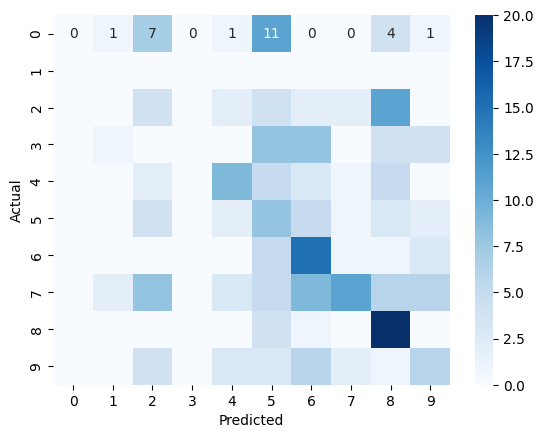

In [22]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

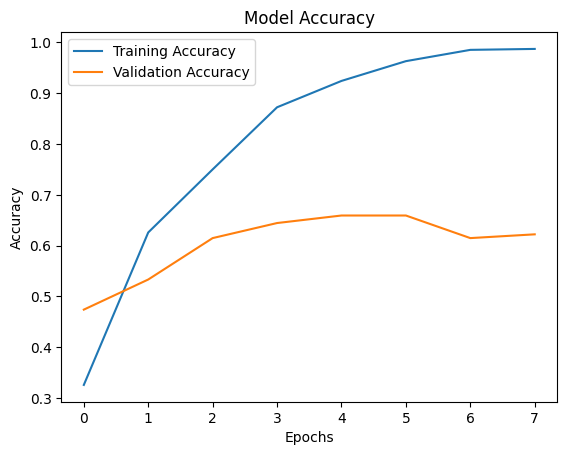

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


In [ ]:
img1 = image.load_img('/content/train4.jpg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred1 = np.argmax(model.predict(img1))
output = ['Acne and Rosacea Photos','Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions','Atopic Dermatitis Photos',
          'Bullous Disease Photos','Cellulitis Impetigo and other Bacterial Infections','Eczema Photos',
          'Lupus and other Connective Tissue diseases','Melanoma Skin Cancer Nevi and Moles',
          'Psoriasis pictures Lichen Planus and related diseases']
print(output[pred1])